In [336]:
#The goal here is to predict the critical temperature based on the 81 extracted features.

In [337]:
#ALL IMPORTS ARE HERE
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [338]:
df1 = pd.read_csv("train.csv")
df1

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [339]:
#We began our data preprocess by taking a look at the data types of each column in order to see if there were some miss-labeled data types and if there were missing values. Since there were no missing values detected, it was not necessary to do any missing value imputation.

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [340]:
#int to float
df1[['number_of_elements', 'range_atomic_radius', 'range_Valence']] = df1[['number_of_elements', 'range_atomic_radius', 'range_Valence']].astype(float)
#df1.info()

In [341]:
def critical_temp_sep(x):
    if x < 1.0:
        return 'VeryLow'
    elif x >= 1.0 and x < 5.0:
        return 'Low'
    elif x >= 5.0 and x < 20.0:
        return 'Medium'
    elif x >= 20.0 and x < 100.0:
        return 'High'
    else:
        return 'VeryHigh'

In [342]:
df1['critical_temp classes'] = df1['critical_temp'].apply(critical_temp_sep)
df1.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,critical_temp classes
0,4.0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.213364,2.219783,1.368922,1.066221,1.0,1.085714,0.433013,0.437059,29.0,High
1,5.0,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,1.888175,2.210679,1.557113,1.047221,2.0,1.128571,0.632456,0.468606,26.0,High
2,4.0,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.213364,2.232679,1.368922,1.029175,1.0,1.114286,0.433013,0.444697,19.0,Medium
3,4.0,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.213364,2.226222,1.368922,1.048834,1.0,1.100000,0.433013,0.440952,22.0,High
4,4.0,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.213364,2.206963,1.368922,1.096052,1.0,1.057143,0.433013,0.428809,23.0,High


In [343]:
#With the critical_temp classes created, we can remove our classification and regression labels from our X dataset and store them in two separate datasets, y_clf and y_reg, for the classification and regression tasks, respectively. 
y_clf = df1['critical_temp classes']
y_clf

0            High
1            High
2          Medium
3            High
4            High
           ...   
21258         Low
21259    VeryHigh
21260         Low
21261         Low
21262      Medium
Name: critical_temp classes, Length: 21263, dtype: object

In [344]:
y_reg = df1['critical_temp']
y_reg

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21263, dtype: float64

In [345]:
X = df1.drop(columns=['critical_temp', 'critical_temp classes'])
X

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4.0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1.0,1.085714,0.433013,0.437059
1,5.0,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2.0,1.128571,0.632456,0.468606
2,4.0,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1.0,1.114286,0.433013,0.444697
3,4.0,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1.0,1.100000,0.433013,0.440952
4,4.0,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1.0,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4.0,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,1.0,2.168889,0.433013,0.496904
21259,5.0,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,1.0,0.904762,0.400000,0.212959
21260,2.0,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,1.0,3.200000,0.500000,0.400000
21261,2.0,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,1.0,2.210000,0.500000,0.462493


In [346]:
#With the removal of the classification and regression labels, we can now split our data into train and test datasets.

#For the classification data, in order to account for unbalanced classes, the performed split was done with stratification to guarantee an even class distribution in both train and test sets. This is not a necessary step for the split of the regression data. 

#For both cases, the data was split with a 67/33 ratio (67% for training and 33% for testing).

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, 
                     test_size=0.33,
                     stratify=y_clf,
                     random_state=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, 
                    test_size=0.33,
                    random_state=1)

print('Train: ', X_train_clf.shape)
print('Test: ', X_test_clf.shape)

Train:  (14246, 81)
Test:  (7017, 81)


In [347]:
#With the datasets divided into training and testing, we next proceeded to scale the datasets. This step needs to be done after the train and test split to avoid that the data present on the test dataset influences the training data. This problem is solved by first splitting the training and test sets and then fitting the scaler with the training set. The test set will be transformed with the fit done with the training set.

#The scaling itself is an important process since there are features in different scales that would influence the algorithms. The standardization consists of bringing the features into a mean of zero and a standard variation of one.

std_scaler = StandardScaler()
X_train_clf = std_scaler.fit_transform(X_train_clf)
X_train_clf = pd.DataFrame(X_train_clf, columns = X.columns)
X_train_clf

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,0.616832,0.053112,-0.670640,-0.023413,-0.649916,0.770920,0.862553,0.132326,-0.631753,0.102955,...,-0.763555,-0.898582,-0.671926,-0.840591,0.747765,0.520441,-0.839840,-0.458240,-0.722709,-0.871802
1,-1.471426,0.346379,-1.808646,-0.977537,-1.341123,-2.688600,-1.144739,1.127963,-1.045978,2.209884,...,1.247661,-0.885092,0.656104,-0.856325,-1.950867,-2.134007,2.383968,0.347129,3.432344,0.056247
2,1.312918,0.334123,-0.367093,-0.012625,-0.598946,1.015149,0.811118,1.417476,-0.162196,1.224505,...,-0.508163,-0.613698,-0.537427,-0.663926,1.073971,0.847178,0.772064,-0.434944,0.549879,0.805352
3,1.312918,1.116186,1.268136,0.618120,0.755005,1.162377,0.906151,1.417476,0.750427,1.369436,...,-0.188922,-0.136660,-0.245648,-0.271150,1.084195,1.289338,0.772064,-0.330782,0.651495,1.416743
4,-0.079254,0.053373,-0.447541,-0.153167,-0.611242,0.045275,-0.107160,0.132326,0.027668,0.377432,...,-0.907214,-0.747197,-0.804580,-0.706986,0.187046,-0.012456,-0.839840,-0.390547,-0.840296,-0.512474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14241,-0.775340,-0.686889,0.020301,-0.338538,0.284898,-0.416528,-0.364008,-1.016761,-0.089015,-0.921822,...,1.726523,1.660976,1.794193,1.699392,-0.535769,-0.142858,-0.033888,0.326638,-0.047602,0.461156
14242,-0.079254,0.814158,0.037208,0.102683,-0.564338,-0.010664,-0.035742,0.888832,0.088594,0.993001,...,0.529370,0.499857,0.489767,0.434597,0.093442,0.175188,0.772064,-0.057568,0.949853,1.371390
14243,1.312918,-0.867769,-0.084076,-0.713340,-0.085489,1.150894,0.616048,0.103377,0.071179,-0.187427,...,-0.188922,-0.602863,-0.292201,-0.633377,1.019937,1.725277,1.578016,-1.001839,1.187931,0.682547
14244,-1.471426,1.335524,1.805343,1.792060,2.037408,-1.310106,-1.360456,-1.679974,1.590047,-1.619937,...,-0.188922,-0.129665,-0.052744,-0.048471,-1.534499,-1.296356,-1.645792,0.019273,-1.735370,-1.480551


In [348]:
X_test_clf = std_scaler.transform(X_test_clf)
X_test_clf = pd.DataFrame(X_test_clf, columns = X.columns)
X_test_clf

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,-0.079254,0.098486,0.504120,-0.132770,0.408772,0.035008,0.282533,0.230196,-0.000090,0.443333,...,-0.907214,-0.825138,-0.804580,-0.776992,0.187046,0.692769,-0.839840,-0.932095,-0.840296,-0.653133
1,0.616832,-0.120707,-0.578914,-0.798867,-0.762924,0.105036,0.742139,0.888832,-0.579403,1.358401,...,-0.188922,-0.269559,-0.119498,-0.261690,0.742053,1.107861,-0.033888,-0.697912,-0.428031,0.028111
2,0.616832,-0.444133,-0.625603,-0.342940,-0.628853,0.792695,0.632581,0.103377,-0.441878,-0.249065,...,-0.955100,-0.903196,-0.847035,-0.844512,0.760858,0.476575,-0.839840,-0.442377,-0.908536,-0.890313
3,-1.471426,-0.366312,-0.034515,0.045860,0.260720,-1.441476,-0.952255,-1.221732,-0.891542,-0.994928,...,2.684245,2.388425,2.814541,2.504646,-1.534499,-1.004274,-1.645792,-0.288092,-1.735370,-1.480551
4,-1.471426,-1.809521,-1.855399,-1.560710,-1.337309,-2.124664,-1.368804,-1.210594,-1.001168,-0.979736,...,-1.146644,-0.969029,-1.008505,-0.899510,-1.534499,-2.337177,-1.645792,0.367620,-1.735370,-1.480551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,-1.471426,2.352473,2.083685,2.753137,2.295160,-1.315881,-1.795383,-1.460378,2.908020,-1.320423,...,-0.188922,-0.129665,-0.052744,-0.048471,-1.534499,-1.981977,-1.645792,1.002841,-1.735370,-1.480551
7013,1.312918,0.559220,-0.407695,0.070749,-0.611174,0.951297,1.150176,1.417476,-0.397975,1.620585,...,-0.348542,-0.644475,-0.420405,-0.684041,1.049514,1.027517,0.772064,-0.479341,0.772732,0.697043
7014,0.616832,-0.139359,-0.437392,-0.375696,-0.615254,0.401778,0.856235,1.417476,-0.380482,1.141109,...,-0.572011,-0.647125,-0.624051,-0.687990,0.570345,0.904818,0.772064,-0.647225,0.745133,0.718656
7015,-0.775340,0.274602,-0.366034,-0.391070,-0.623404,-1.020212,-0.561382,0.931444,0.047517,1.177723,...,1.407282,1.414763,1.456267,1.434567,-0.551554,-0.445882,-0.033888,0.736458,0.213497,0.686591


In [349]:
std_scaler = StandardScaler()
X_train_reg = std_scaler.fit_transform(X_train_reg)
X_train_reg = pd.DataFrame(X_train_reg, columns = X.columns)
X_train_reg

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,-1.456226,0.931499,0.353731,-0.020351,-0.249156,-2.256446,-1.424798,1.234151,0.716737,2.342903,...,-0.196405,-0.413937,-0.224345,-0.461307,-1.658667,-0.933029,-0.029469,-1.513099,0.333137,0.589181
1,-0.764228,-0.352700,-0.243133,-0.273822,-0.133142,-0.677070,-0.073308,-0.056769,-0.584523,0.123776,...,0.120013,0.033943,0.103650,-0.025636,-0.600340,-0.019978,-0.029469,-0.703321,0.215406,0.668379
2,1.311764,-0.241630,-0.486365,-0.245097,-0.625381,1.223349,-0.121441,0.141349,0.115412,0.093373,...,-0.987451,-0.749029,-0.876404,-0.709037,1.229226,0.053462,-0.833717,-0.363379,-0.958243,-0.509361
3,-0.764228,0.708368,0.058854,0.455647,0.082596,-0.706649,-0.399475,0.819848,0.106121,1.055949,...,2.651360,2.364581,2.778925,2.478353,-0.489825,-0.434249,-1.637964,0.966530,-1.725423,-1.475417
4,-0.764228,2.207152,2.438335,2.493154,2.495172,-0.250037,-0.048047,-0.536911,0.315066,-0.381811,...,0.120013,0.176498,0.224029,0.232947,-0.514391,0.029884,-0.833717,-0.750136,-0.755008,-0.415266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14241,-1.456226,-0.429094,0.212593,0.049931,0.539167,-1.346494,-1.262233,-1.504997,0.308971,-1.389836,...,-0.196405,0.147324,-0.224345,0.098135,-1.658667,-1.446508,-0.029469,0.541814,0.333137,0.583962
14242,-0.764228,0.482890,0.534688,0.587436,0.594428,-0.531130,-0.074445,0.084704,-0.225302,0.486682,...,-0.196405,-0.344474,-0.171248,-0.366443,-0.585324,0.106357,-0.029469,-1.258778,-0.044615,0.340300
14243,-0.072231,0.190333,-0.561328,-0.100343,-0.621518,0.014120,0.688495,0.475526,-0.864340,0.620877,...,-0.908346,-0.914070,-0.806769,-0.854125,0.193904,0.344892,-0.833717,-0.631453,-0.834040,-0.929175
14244,-1.456226,0.305381,0.702423,0.807573,1.030412,-1.281898,-0.926920,-2.060436,-0.829818,-2.146754,...,2.651360,2.364581,2.778925,2.478353,-1.515418,-0.946144,-1.637964,-0.902729,-1.725423,-1.475417


In [350]:
X_test_reg = std_scaler.transform(X_test_reg)
X_test_reg = pd.DataFrame(X_test_reg, columns = X.columns)
X_test_reg

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,-0.072231,-0.377096,-0.497261,-0.391332,-0.626747,0.093706,-0.109977,0.141349,-0.004269,0.001542,...,-0.908346,-0.755298,-0.806769,-0.714764,0.193904,0.043931,-0.833717,-0.408620,-0.834040,-0.518329
1,-1.456226,3.342116,3.332772,3.704438,3.433595,-1.282424,-1.139486,-1.944996,1.659109,-1.989440,...,2.651360,2.364581,2.778925,2.478353,-1.515418,-1.195404,-1.637964,1.172530,-1.725423,-1.475417
2,1.311764,1.085680,1.233038,0.589473,0.727036,1.160466,0.644567,1.417885,0.979633,1.367312,...,-0.196405,-0.115246,-0.252999,-0.259471,1.084684,1.039273,0.774778,-0.122811,0.651598,1.495863
3,0.619767,-1.088446,-0.875049,-0.996419,-0.724311,0.414904,0.871923,0.112594,-0.720838,0.010786,...,-1.335511,-1.024003,-1.253970,-0.975082,0.730576,0.793680,-0.833717,-0.672734,-0.901999,-0.934726
4,0.619767,-1.444867,-0.766572,-1.083348,-0.528025,0.805666,0.576211,-0.933465,-0.415499,-0.999476,...,-0.765958,-0.284934,-0.922375,-0.448513,0.443841,0.556264,1.579026,-0.096168,1.066944,1.568691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,0.619767,0.037115,-0.674447,-0.039634,-0.652224,0.771852,0.803612,0.141349,-0.593726,0.110417,...,-0.765958,-0.902658,-0.675340,-0.844463,0.750642,0.495049,-0.833717,-0.450401,-0.716939,-0.880120
7013,-0.072231,0.132883,-0.497709,-0.124613,-0.598786,0.028882,0.683548,0.350013,-0.772989,0.527212,...,-0.908346,-0.901635,-0.806769,-0.843594,0.193904,0.419917,-0.833717,-0.676033,-0.834040,-0.875989
7014,-0.072231,-0.411743,0.217800,-0.185905,0.470592,0.254416,0.114811,-0.160190,-0.145163,-0.260446,...,0.278222,0.030626,0.091790,-0.152524,-0.002140,-0.270115,0.774778,0.464501,1.362418,1.742973
7015,-0.764228,-0.542128,-0.169540,-0.031020,0.206053,-0.209872,-0.057543,-1.659322,-0.638307,-1.645014,...,1.385686,0.989214,1.340916,0.897246,-0.585103,-0.072435,0.774778,-0.139766,0.842053,1.564831


In [351]:
#Given the high number of features of our data, we decided to perform a feature selection. To perform the features selection, we decided to perform a Principal Component Analysis (PCA).

pca = PCA()
pca.fit_transform(X_train_clf)

array([[-4.69806350e+00, -1.04485364e-01, -2.70939220e+00, ...,
        -1.59475574e-03,  2.53311006e-03, -1.37784782e-03],
       [ 5.41348190e+00,  2.19361002e+00, -1.36700284e+00, ...,
         7.03319214e-02,  6.26032513e-02, -2.41466466e-04],
       [-5.62307995e+00, -1.44969909e+00,  6.35805672e-01, ...,
        -2.85855838e-03,  1.60868994e-04, -3.33924673e-03],
       ...,
       [-3.69129028e+00, -2.36931084e+00,  2.68324929e+00, ...,
         9.00215815e-03,  9.15548169e-03, -2.24859139e-02],
       [ 8.90867307e+00, -2.95939513e+00, -5.42463870e+00, ...,
        -1.28374489e-02, -2.71462069e-03,  2.17130661e-04],
       [ 1.61648039e+00, -2.61160952e+00,  4.93862206e+00, ...,
        -2.05059806e-02,  7.11008281e-03, -2.23088022e-03]])

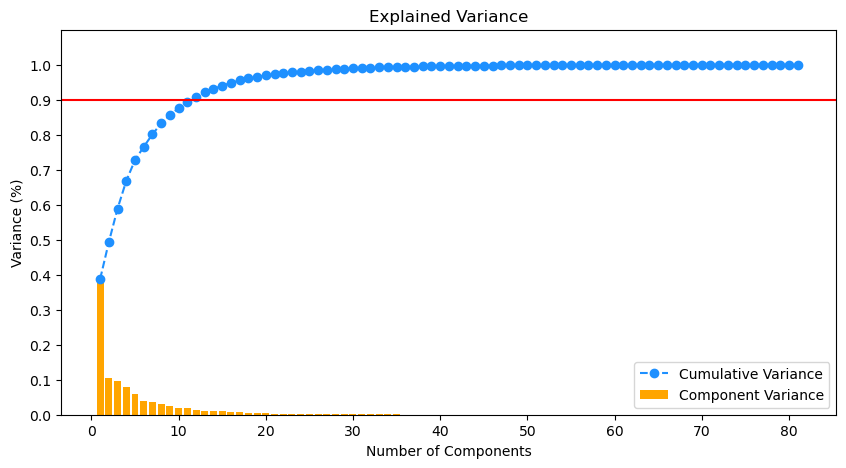

In [352]:
pca = PCA()
pca.fit_transform(X_train_clf)

plt.rcParams["figure.figsize"] = (12,6)

sum_y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(sum_y)+1)

plt.figure(figsize=(10, 5))
plt.ylim(0.0,1.1)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.plot(xi, sum_y, marker='o', linestyle='--', color='dodgerblue', label = 'Cumulative Variance')
plt.bar(xi, pca.explained_variance_ratio_, color='orange', label = 'Component Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.legend(loc='best')
plt.title('Explained Variance')

plt.axhline(y=0.9, color='r', linestyle='-')

plt.show()


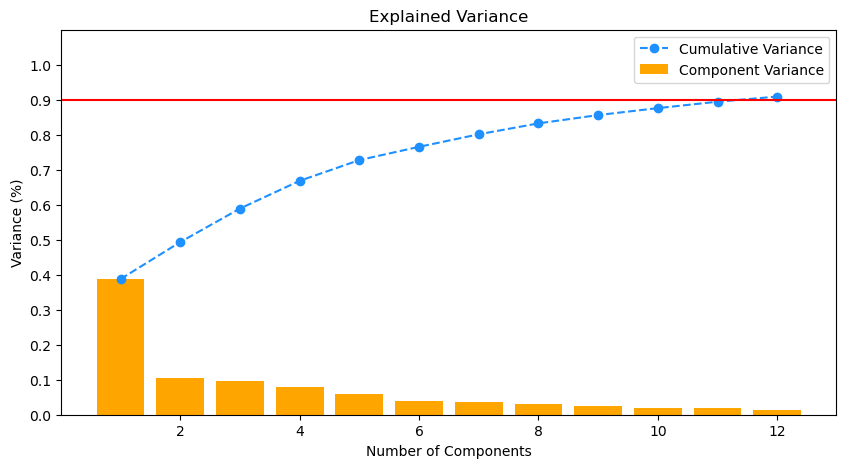

In [353]:
pca = PCA(n_components=0.90) #our threshold
pca.fit_transform(X_train_clf)

plt.rcParams["figure.figsize"] = (12,6)

sum_y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(sum_y)+1)

plt.figure(figsize=(10, 5))
plt.ylim(0.0,1.1)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.plot(xi, sum_y, marker='o', linestyle='--', color='dodgerblue', label = 'Cumulative Variance')
plt.bar(xi, pca.explained_variance_ratio_, color='orange', label = 'Component Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.legend(loc='best')
plt.title('Explained Variance')

plt.axhline(y=0.9, color='r', linestyle='-')

plt.show()

In [354]:
pca = PCA(n_components = 12)
X_train_clf = pd.DataFrame(pca.fit_transform(X_train_clf))
X_train_clf

,0,1,2,3,4,5,6,7,8,9,10,11
0,-4.698064,-0.104485,-2.709392,0.491177,0.997380,-0.659992,-0.575274,-0.466122,-0.387402,0.509425,0.151278,-0.315062
1,5.413482,2.193610,-1.367003,-1.232948,2.754301,3.603456,6.692865,3.435687,4.459866,-2.308491,0.370785,0.053416
2,-5.623080,-1.449699,0.635806,-0.026392,0.087895,-1.605525,0.822479,0.141875,0.985519,-0.684506,0.136904,0.698523
3,-3.751193,-4.602590,2.824781,-0.570097,-1.447894,1.451363,0.003549,-0.123639,-0.504531,1.021852,1.614348,0.740920
4,-3.586761,1.268490,-2.961714,1.783375,0.328707,-0.254957,0.435861,-0.099905,-0.413726,0.175734,0.704905,0.161483
...,...,...,...,...,...,...,...,...,...,...,...,...
14241,2.935680,2.950708,0.975395,2.596931,-4.206508,-0.669319,-1.972557,-1.016699,-0.881297,0.708276,-0.379976,-1.441880
14242,2.230537,-1.782015,3.607506,-2.740844,0.708058,-1.953240,2.554702,-1.168497,0.247551,1.898565,1.216631,-0.127363
14243,-3.691290,-2.369311,2.683249,-3.492756,-3.766717,1.870318,-1.158772,0.816035,-0.757342,1.652209,-0.268488,-1.221387
14244,8.908673,-2.959395,-5.424639,-2.535435,-2.736764,-0.170945,0.134492,-0.145284,-1.352928,1.464695,0.201012,1.139099


In [355]:
X_test_clf = pd.DataFrame(pca.transform(X_test_clf))
X_test_clf

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.237580,-1.643463,-1.714215,-0.297565,1.130305,4.169246,-1.295248,0.252976,-1.042141,2.630798,0.691884,-0.417274
1,-0.810556,1.301249,6.203464,-4.110469,2.127250,-1.151365,0.417766,-3.056063,-1.775994,1.317693,0.660102,1.105950
2,-4.803056,0.390458,-2.278571,0.049233,0.688363,0.022458,-0.471356,-0.051462,-0.819984,-0.758605,-0.599863,-0.260044
3,9.619843,-0.763105,-0.888790,-1.143846,-0.090379,0.841754,-0.799467,-4.262708,2.012377,-1.450235,0.703536,-1.952622
4,5.123065,4.549015,-4.992907,-3.334010,1.471155,4.804211,0.863634,2.173423,1.383787,-4.047460,-1.600411,-0.236471
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,10.719543,-4.082149,-5.197643,-1.493290,-1.390562,-2.019716,1.232150,0.798361,-2.752210,2.133949,0.359877,0.946811
7013,-5.841919,-1.602209,0.992532,0.147741,-0.164594,-1.254418,0.967453,-0.023387,1.198945,-1.265925,0.027987,0.770999
7014,-5.278564,-0.363550,0.418893,0.114164,-0.482839,-0.237266,1.055337,0.043826,1.587710,-0.857224,-0.142305,0.693805
7015,4.220374,4.346315,6.080372,-1.157796,6.510422,-1.148872,1.772011,-1.186353,-0.884481,1.110613,-1.941270,-0.081593


In [356]:
pca = PCA(n_components = 12)
X_train_reg = pd.DataFrame(pca.fit_transform(X_train_reg))
X_train_reg

,0,1,2,3,4,5,6,7,8,9,10,11
0,5.401915,-1.229822,2.212289,-1.407336,-0.262161,4.538237,5.591222,0.097540,2.600940,-0.392001,0.027793,1.396212
1,2.401154,1.204010,-0.765378,-1.749729,4.132166,2.765464,-2.719074,-0.704510,3.229922,1.301377,-1.477481,1.532807
2,-4.747854,-1.074589,2.337743,-0.188531,0.810529,-2.054584,0.001650,0.509117,-0.582505,-0.709687,0.046321,-0.123001
3,3.466084,0.502040,-2.554914,6.559742,2.338898,0.112142,-0.363404,-3.065806,-0.780706,-1.406232,-2.552841,-2.751167
4,4.882575,-5.296449,-0.253081,-0.981324,-2.705000,0.043708,-0.180082,-2.169677,0.096328,1.074466,1.146656,2.280746
...,...,...,...,...,...,...,...,...,...,...,...,...
14241,7.635740,-0.446978,1.608562,-1.778485,-2.484696,0.475807,-0.297190,0.121151,0.911013,0.969004,-0.212203,-0.676108
14242,3.976865,-2.393925,-0.622518,-2.183688,-0.919479,0.337915,1.465494,-1.005506,0.877848,1.133162,2.306990,0.705640
14243,-4.192859,0.397444,3.057418,1.665089,1.155119,0.681779,0.117599,-0.810160,-0.147108,0.956852,-0.257283,-0.125074
14244,10.787953,-1.656541,1.426934,-2.214466,-0.189596,0.299975,-2.306894,-4.697596,0.715034,-0.594786,0.178575,-0.932671


In [357]:
X_test_reg = pd.DataFrame(pca.transform(X_test_reg))
X_test_reg

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.550532,1.111011,2.967456,1.540273,0.001998,0.026378,0.288501,0.004254,-0.307199,-0.498424,-0.394469,0.126770
1,13.919079,-4.226585,-1.701078,3.535199,3.790686,1.243068,-4.162425,-2.826463,-1.080201,-2.398983,2.218724,2.605887
2,-3.566603,-3.944066,-3.355068,-0.412364,-1.136442,1.410767,0.116478,0.303979,-0.645098,0.950052,-1.630797,0.830082
3,-6.705089,2.688051,0.303271,1.511322,-0.945767,3.210686,-2.179472,0.529316,-1.428379,-0.812965,2.237341,-0.942471
4,-5.315045,2.227560,-2.060149,1.311204,-2.146985,1.239991,-3.870388,2.262259,2.113803,-0.735434,2.400521,-1.197601
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,-4.667852,-0.504836,2.684725,0.621640,0.980217,-0.665604,-0.550706,-0.351034,-0.422007,0.501341,-0.166228,-0.332127
7013,-4.232676,0.249912,2.978525,1.442908,0.853286,0.496060,0.164361,-0.927740,-0.090302,1.056023,-0.189412,-0.153139
7014,1.464364,0.047517,-2.135814,-1.554024,-1.997239,-0.750560,0.013387,1.120651,-0.058322,0.786556,-0.604361,0.614903
7015,1.966089,3.567356,-2.278962,4.163376,-5.304683,1.767123,-4.737393,0.554232,0.048722,-0.100836,2.532909,-2.063782


# With merged datasets

In [358]:
df2 = pd.read_csv("unique_m.csv")

df = pd.concat([df1, df2], axis=1) #joining the two datasets together
#df.head()

In [359]:
df = df.drop(df.columns[-1], axis=1)
#df.head()

In [360]:
df = df.loc[:,~df.columns.duplicated()].copy() #eliminates duplicate columns (critical_temp)
#df.head()

In [361]:
df['critical_temp classes'] = df['critical_temp'].apply(critical_temp_sep)
#df.head()

In [362]:
y1_clf = df['critical_temp classes']

In [363]:
y1_reg = df['critical_temp']

In [364]:
X1 = df.drop(columns=['critical_temp', 'critical_temp classes'])

In [365]:
X1_train_clf, X1_test_clf, y1_train_clf, y1_test_clf = train_test_split(X1, y1_clf, 
                     test_size=0.33,
                     stratify=y1_clf,
                     random_state=1)

X1_train_reg, X1_test_reg, y1_train_reg, y1_test_reg = train_test_split(X1, y1_reg, 
                    test_size=0.33,
                    random_state=1)

print('Train: ', X1_train_clf.shape)
print('Test: ', X1_test_clf.shape)

Train:  (14246, 167)
Test:  (7017, 167)


In [366]:
std_scaler = StandardScaler()
X1_train_clf = std_scaler.fit_transform(X1_train_clf)
X1_train_clf = pd.DataFrame(X1_train_clf, columns = X1.columns)
X1_train_clf

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,0.616832,0.053112,-0.670640,-0.023413,-0.649916,0.770920,0.862553,0.132326,-0.631753,0.102955,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
1,-1.471426,0.346379,-1.808646,-0.977537,-1.341123,-2.688600,-1.144739,1.127963,-1.045978,2.209884,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
2,1.312918,0.334123,-0.367093,-0.012625,-0.598946,1.015149,0.811118,1.417476,-0.162196,1.224505,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,2.800829,0.0,0.0,0.0
3,1.312918,1.116186,1.268136,0.618120,0.755005,1.162377,0.906151,1.417476,0.750427,1.369436,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,1.208326,2.062648,0.0,0.0,0.0
4,-0.079254,0.053373,-0.447541,-0.153167,-0.611242,0.045275,-0.107160,0.132326,0.027668,0.377432,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14241,-0.775340,-0.686889,0.020301,-0.338538,0.284898,-0.416528,-0.364008,-1.016761,-0.089015,-0.921822,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
14242,-0.079254,0.814158,0.037208,0.102683,-0.564338,-0.010664,-0.035742,0.888832,0.088594,0.993001,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
14243,1.312918,-0.867769,-0.084076,-0.713340,-0.085489,1.150894,0.616048,0.103377,0.071179,-0.187427,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
14244,-1.471426,1.335524,1.805343,1.792060,2.037408,-1.310106,-1.360456,-1.679974,1.590047,-1.619937,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0


In [367]:
X1_test_clf = std_scaler.transform(X1_test_clf)
X1_test_clf = pd.DataFrame(X1_test_clf, columns = X1.columns)
X1_test_clf

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,-0.079254,0.098486,0.504120,-0.132770,0.408772,0.035008,0.282533,0.230196,-0.000090,0.443333,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
1,0.616832,-0.120707,-0.578914,-0.798867,-0.762924,0.105036,0.742139,0.888832,-0.579403,1.358401,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
2,0.616832,-0.444133,-0.625603,-0.342940,-0.628853,0.792695,0.632581,0.103377,-0.441878,-0.249065,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
3,-1.471426,-0.366312,-0.034515,0.045860,0.260720,-1.441476,-0.952255,-1.221732,-0.891542,-0.994928,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
4,-1.471426,-1.809521,-1.855399,-1.560710,-1.337309,-2.124664,-1.368804,-1.210594,-1.001168,-0.979736,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,-1.471426,2.352473,2.083685,2.753137,2.295160,-1.315881,-1.795383,-1.460378,2.908020,-1.320423,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0
7013,1.312918,0.559220,-0.407695,0.070749,-0.611174,0.951297,1.150176,1.417476,-0.397975,1.620585,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,0.531221,2.357921,0.0,0.0,0.0
7014,0.616832,-0.139359,-0.437392,-0.375696,-0.615254,0.401778,0.856235,1.417476,-0.380482,1.141109,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,5.605916,0.0,0.0,0.0
7015,-0.775340,0.274602,-0.366034,-0.391070,-0.623404,-1.020212,-0.561382,0.931444,0.047517,1.177723,...,-0.074038,-0.112861,-0.027565,-0.183436,-0.174702,-0.145885,-0.299530,0.0,0.0,0.0


In [368]:
std_scaler = StandardScaler()
X1_train_reg = std_scaler.fit_transform(X1_train_reg)
X1_train_reg = pd.DataFrame(X1_train_reg, columns = X1.columns)
X1_train_reg

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,-1.456226,0.931499,0.353731,-0.020351,-0.249156,-2.256446,-1.424798,1.234151,0.716737,2.342903,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,3.631293,-0.301955,0.0,0.0,0.0
1,-0.764228,-0.352700,-0.243133,-0.273822,-0.133142,-0.677070,-0.073308,-0.056769,-0.584523,0.123776,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
2,1.311764,-0.241630,-0.486365,-0.245097,-0.625381,1.223349,-0.121441,0.141349,0.115412,0.093373,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
3,-0.764228,0.708368,0.058854,0.455647,0.082596,-0.706649,-0.399475,0.819848,0.106121,1.055949,...,2.233840,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
4,-0.764228,2.207152,2.438335,2.493154,2.495172,-0.250037,-0.048047,-0.536911,0.315066,-0.381811,...,-0.073018,-0.106397,-0.0264,-0.17951,5.244428,-0.168550,-0.301955,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14241,-1.456226,-0.429094,0.212593,0.049931,0.539167,-1.346494,-1.262233,-1.504997,0.308971,-1.389836,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
14242,-0.764228,0.482890,0.534688,0.587436,0.594428,-0.531130,-0.074445,0.084704,-0.225302,0.486682,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
14243,-0.072231,0.190333,-0.561328,-0.100343,-0.621518,0.014120,0.688495,0.475526,-0.864340,0.620877,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
14244,-1.456226,0.305381,0.702423,0.807573,1.030412,-1.281898,-0.926920,-2.060436,-0.829818,-2.146754,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0


In [369]:
X1_test_reg = std_scaler.transform(X1_test_reg)
X1_test_reg = pd.DataFrame(X1_test_reg, columns = X1.columns)
X1_test_reg

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,-0.072231,-0.377096,-0.497261,-0.391332,-0.626747,0.093706,-0.109977,0.141349,-0.004269,0.001542,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
1,-1.456226,3.342116,3.332772,3.704438,3.433595,-1.282424,-1.139486,-1.944996,1.659109,-1.989440,...,0.249942,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
2,1.311764,1.085680,1.233038,0.589473,0.727036,1.160466,0.644567,1.417885,0.979633,1.367312,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,0.591419,2.396428,0.0,0.0,0.0
3,0.619767,-1.088446,-0.875049,-0.996419,-0.724311,0.414904,0.871923,0.112594,-0.720838,0.010786,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
4,0.619767,-1.444867,-0.766572,-1.083348,-0.528025,0.805666,0.576211,-0.933465,-0.415499,-0.999476,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,0.619767,0.037115,-0.674447,-0.039634,-0.652224,0.771852,0.803612,0.141349,-0.593726,0.110417,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
7013,-0.072231,0.132883,-0.497709,-0.124613,-0.598786,0.028882,0.683548,0.350013,-0.772989,0.527212,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
7014,-0.072231,-0.411743,0.217800,-0.185905,0.470592,0.254416,0.114811,-0.160190,-0.145163,-0.260446,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0
7015,-0.764228,-0.542128,-0.169540,-0.031020,0.206053,-0.209872,-0.057543,-1.659322,-0.638307,-1.645014,...,-0.073018,-0.106397,-0.0264,-0.17951,-0.177907,-0.168550,-0.301955,0.0,0.0,0.0


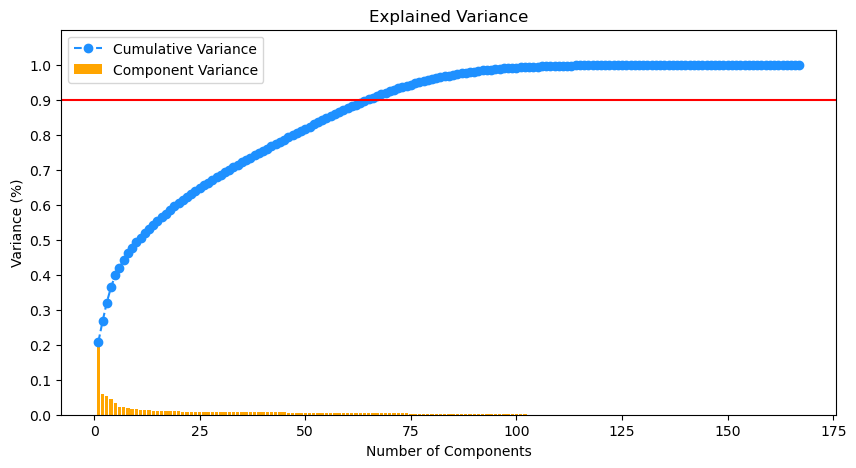

In [370]:
pca = PCA()
pca.fit_transform(X1_train_clf)

plt.rcParams["figure.figsize"] = (12,6)

sum_y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(sum_y)+1)

plt.figure(figsize=(10, 5))
plt.ylim(0.0,1.1)
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.plot(xi, sum_y, marker='o', linestyle='--', color='dodgerblue', label = 'Cumulative Variance')
plt.bar(xi, pca.explained_variance_ratio_, color='orange', label = 'Component Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.legend(loc='best')
plt.title('Explained Variance')

plt.axhline(y=0.9, color='r', linestyle='-')

plt.show()


In [371]:
pca = PCA(n_components = 12)
X1_train_clf = pd.DataFrame(pca.fit_transform(X1_train_clf))
X1_train_clf

,0,1,2,3,4,5,6,7,8,9,10,11
0,-5.013261,-0.118666,-3.145671,0.404825,1.061629,0.534541,-0.692990,-0.725850,0.372242,-0.874399,0.210716,0.484965
1,5.534115,1.961126,-1.504232,-1.477745,2.084832,-3.895993,5.772182,3.804154,-0.121864,3.071327,0.670934,2.085809
2,-5.883834,-1.619252,1.161300,-0.079420,-0.053913,1.567742,1.278859,0.327416,-0.252302,2.908670,-0.137112,-0.834377
3,-3.693754,-4.482163,3.496828,-0.430564,-1.301141,-0.706527,-0.295176,0.176788,-2.340278,0.986338,-1.789459,0.114333
4,-3.461614,1.193951,-2.869797,1.679980,-0.100191,0.255715,0.705588,-0.209848,-0.293672,0.094063,0.248440,0.125076
...,...,...,...,...,...,...,...,...,...,...,...,...
14241,3.194446,2.863148,0.888263,2.923454,-4.034770,0.788314,-1.750200,-1.459718,0.345624,-0.778916,-0.126839,0.016113
14242,2.548257,-1.306254,3.846762,-2.833805,1.399642,1.297773,2.303956,-2.538507,-1.179522,-0.173459,-1.058401,1.764781
14243,-3.721959,-2.142344,2.930592,-3.268940,-3.197986,-1.281991,-1.857999,0.778880,-0.216877,-2.672379,-0.860538,1.234497
14244,8.922580,-3.339415,-5.079731,-2.451486,-3.071959,0.581955,0.154123,-0.066542,-1.040486,-0.916409,-1.354150,-0.523496


In [372]:
X1_test_clf = pd.DataFrame(pca.transform(X1_test_clf))
X1_test_clf

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.399661,-1.592040,-1.915143,-0.138347,0.882567,-3.257844,-2.158679,0.967273,-1.269921,-1.778600,-1.672951,1.694227
1,-0.418604,1.927855,6.140192,-4.186436,2.697386,0.164613,-0.087884,-4.505703,-1.141622,-0.902866,-0.918487,-0.111448
2,-5.074687,0.369649,-2.707666,-0.008412,0.702159,-0.202053,-0.624390,-0.367237,0.311889,-1.049097,0.878650,-0.287329
3,9.639382,-1.004539,-1.122777,-1.037808,-0.259474,-1.258061,-1.087407,-2.772676,2.320896,1.788502,-0.789029,0.365472
4,5.227001,4.012525,-5.027131,-3.404553,0.167404,-4.681557,0.621429,3.232773,0.881446,1.684061,1.722256,-0.807823
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,10.657883,-4.298235,-4.939132,-1.480232,-1.477135,1.992290,1.346097,-0.035147,-1.692043,-1.922540,-0.703996,-0.537292
7013,-6.087618,-1.778756,1.520463,0.087934,-0.267906,1.190622,1.395851,0.312573,-0.076057,3.090445,-0.044545,-1.111624
7014,-6.237803,-1.216639,1.069278,-0.084514,-0.670167,0.361231,1.720396,1.448536,0.667433,5.483709,-0.813697,-1.725430
7015,4.460140,4.601298,5.045886,-1.139984,6.442224,-0.116802,1.014459,-1.543291,0.013398,-0.517535,-0.168331,-1.197534


In [373]:
pca = PCA(n_components = 12)
X1_train_reg = pd.DataFrame(pca.fit_transform(X1_train_reg))
X1_train_reg

,0,1,2,3,4,5,6,7,8,9,10,11
0,5.557909,-1.309239,-1.763321,-1.923563,-0.504431,6.267104,3.410541,1.214089,-0.534546,-3.143209,-0.883791,0.264014
1,2.516516,0.961190,0.565220,-1.747689,3.546055,0.774461,-3.915212,0.364828,0.285579,-2.967472,-1.259831,2.435428
2,-4.602861,-0.921634,-2.116988,-0.231736,0.343653,-1.708356,0.965056,0.059036,-0.323029,0.174267,1.023923,-0.933251
3,3.985818,1.222243,3.084798,8.379762,2.280923,-0.242360,-1.109129,-3.900163,0.461359,-1.444179,3.376275,3.402634
4,4.898368,-5.368439,0.571845,-0.855199,-2.270101,0.089279,0.205680,-1.478471,0.315640,0.266626,-3.042710,-0.819126
...,...,...,...,...,...,...,...,...,...,...,...,...
14241,8.301858,-0.239213,-0.856324,-3.762422,-2.909293,0.023464,-1.471371,-2.246501,-1.386767,1.170763,0.851052,2.806718
14242,4.189979,-2.283642,0.833516,-2.208873,-0.849968,0.745468,1.032109,-0.617979,0.129839,0.365781,-1.418269,0.262674
14243,-4.611091,0.049729,-3.497475,1.532785,1.181437,0.526389,-0.248056,-0.612591,0.321069,0.462783,-0.466344,1.231414
14244,10.851186,-1.988229,-1.659348,-2.037744,-0.363717,-0.128408,-2.220771,-3.546278,2.291332,-0.848770,-1.089652,0.017081


In [374]:
X1_test_reg = pd.DataFrame(pca.transform(X1_test_reg))
X1_test_reg

,0,1,2,3,4,5,6,7,8,9,10,11
0,-3.431393,1.032704,-2.837393,1.425389,-0.477186,0.228051,0.540754,-0.033387,-0.160100,-0.372479,0.503339,-0.381578
1,13.839835,-4.240256,1.016909,3.597463,4.201901,0.407102,-3.792486,-1.371932,1.577249,-0.288230,-1.223342,-3.203272
2,-3.534835,-3.749190,3.981702,-0.262391,-0.994667,0.636790,-0.300742,0.418198,-2.368787,-1.307949,-1.479852,0.462808
3,-7.191153,2.774452,-0.128670,1.905324,-1.486108,2.856786,-4.011802,1.744109,1.215249,2.056506,0.210709,-2.338599
4,-5.114906,3.321484,2.722705,1.787783,-2.305457,-0.869803,-5.186166,2.597070,1.273396,0.517478,0.364854,-0.778184
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,-4.985084,-0.578068,-3.144842,0.529465,1.007938,-0.733771,-0.427731,-0.624802,0.239595,0.975750,0.325172,0.408599
7013,-4.487138,0.147995,-3.233217,1.404644,0.584650,0.550134,-0.057240,-0.653485,0.278211,0.821720,-0.527755,0.913512
7014,1.658918,0.219138,2.279074,-1.542032,-1.774173,-0.845549,0.237943,0.563956,-0.342099,1.109975,-0.280504,0.570152
7015,2.237861,3.628722,2.361582,4.434368,-5.065342,-0.130064,-4.580700,0.491860,1.296333,1.149029,0.154179,-0.590570


In [375]:
counts = y_train_clf.value_counts()
counts

High        6615
Medium      3731
Low         2692
VeryLow      671
VeryHigh     537
Name: critical_temp classes, dtype: int64

<AxesSubplot:>

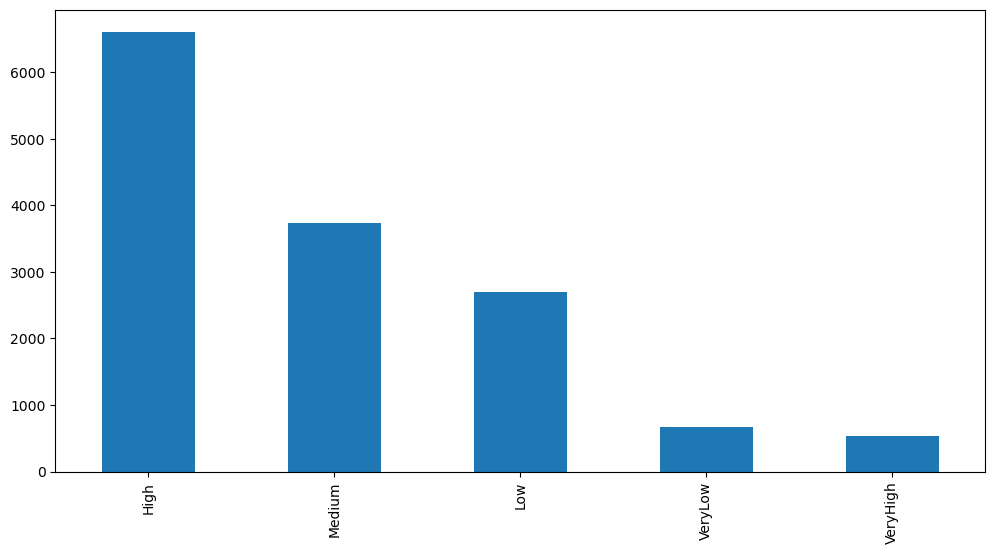

In [376]:
counts.plot(kind='bar')

#### If we work with imbalanced datasets, most machine learning techniques will have a poor performance on the minority class. One possible solution is to oversample the minorities which implies duplicating examples that belong to this minority. It's important to notice that these examples don't add new information. The opposite is also possible. Reduce the examples from the majorities classes. 

#### To proceed with the imbalance we are going to use **SMOTE** (Synthetic Minority Oversampling Technique). SMOTE works by selecting a random example of the minority class and then randomly selecting a neighbor of this example to generate a synthetic example between the two points.

#### The application of this algorithm will only be done upon the hyperparameter tuning and the cross-validation since we should keep the test set with the original distribution and not with a modified distribution of classes that are not representative of the reality. Since cross-validation works by selecting a partition of the training data to be tested, we should keep this partition with the original distribution, just like the main test set.

Text(0.5, 1.0, 'Histogram of critical_temp values')

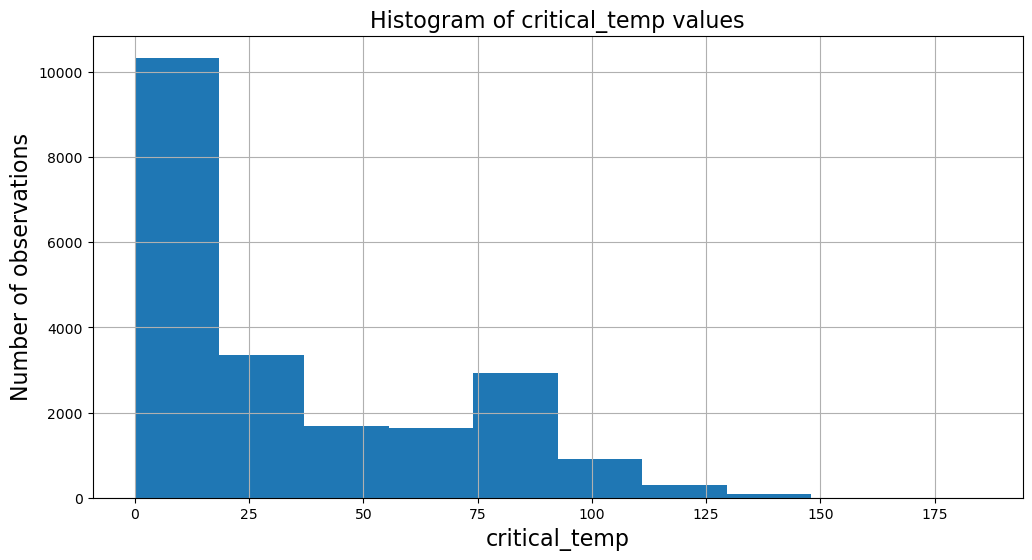

In [378]:
y_reg.hist()
plt.xlabel('critical_temp', fontsize=16)
plt.ylabel('Number of observations', fontsize=16)
plt.title('Histogram of critical_temp values', fontsize=16)